# Test Model on Important Cases.

In [40]:
import numpy as np
np.random.seed(4917)
from keras.models import Model,load_model
import matplotlib.pyplot as plt
import skvideo.io
%matplotlib inline
#from test_environments import Environment1, Environment2, Environment3,Environment4,Environment5
from time import time
from Settings import *
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
#Environment={1:Environment1,2:Environment2,3:Environment3,4:Environment4,5:Environment5}
#Direction={1:'E',2:'E',3:'E',4:'E',5:'E'}
##### IMPORTANT SELECT WHICH ENVIRONMENT YOU WANT TO TEST FROM HERE
from Environments import CreateEnvironment

<img src="./envs.png"></img>

In [2]:
msgs=[',should go',',should not go']
msg='Env:{}'
preferences={
    1:{'sub':(1,1),'dom':(1,9),'food':(2,4),'obs':(2,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    2:{'sub':(1,1),'dom':(7,4),'food':(2,4),'obs':(2,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]},
    3:{'sub':(1,1),'dom':(10,0),'food':(2,4),'obs':(2,5),'subdir':'E','domdir':'N','mesg':msg+msgs[1]},
    4:{'sub':(1,1),'dom':(9,9),'food':(2,4),'obs':(2,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    5:{'sub':(1,1),'dom':(1,9),'food':(2,6),'obs':(2,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' explore'},
    6:{'sub':(1,1),'dom':(1,9),'food':(6,5),'obs':(2,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' analyze the results'},
    7:{'sub':(1,1),'dom':(1,9),'food':(6,5),'obs':(2,5),'subdir':'E','domdir':'W','mesg':msg+msgs[1]+' Replicated'},
    8:{'sub':(1,1),'dom':(3,1),'food':(6,5),'obs':(2,5),'subdir':'W','domdir':'W','mesg':msg+' surprise me'},
    9:{'sub':(1,1),'dom':(9,7),'food':(2,4),'obs':(2,5),'subdir':'E','domdir':'W','mesg':msg+msgs[0]},
    10:{'sub':(1,1),'dom':(1,9),'food':(2,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[1]},
    11:{'sub':(1,1),'dom':(1,9),'food':(7,4),'obs':(7,5),'subdir':'E','domdir':'E','mesg':msg+msgs[0]},
    12:{'sub':(9,1),'dom':(7,1),'food':(8,10),'obs':(2,5),'subdir':'E','domdir':'E','mesg':msg+' race'},
    13:{'sub':(1,1),'dom':(1,9),'food':(1,5),'obs':(0,0),'subdir':'E','domdir':'W','mesg':msg+' SM'},
    14:{'sub':(1,1),'dom':(1,9),'food':(2,4),'obs':(2,5),'subdir':'E','domdir':'W','mesg':msg+'Not Used'}
            }

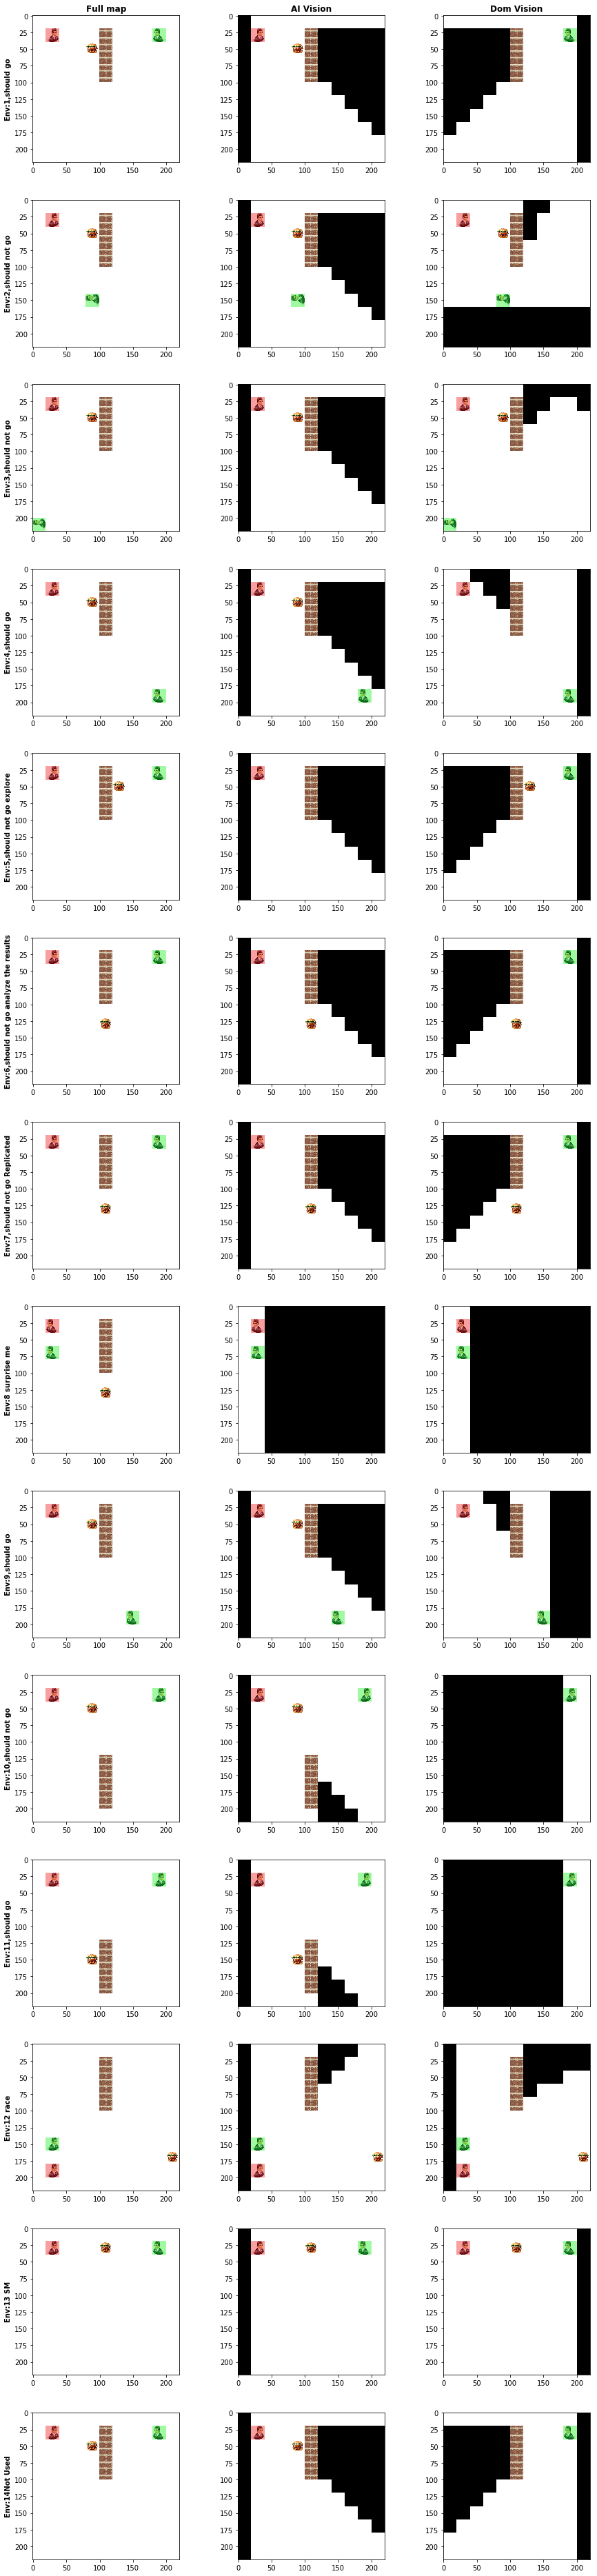

In [39]:
plt.figure(figsize=(13,52))
for env in range(1,15):
    counter = env+(env-1)*2
#     print(env,counter, counter+1,counter+2)
    preferences[env]['mesg']=preferences[env]['mesg'].format(env)
    game = CreateEnvironment(preferences[env])
    ax = plt.subplot(14,3,counter)
    if env==1:
        ax.set_title('Full map',fontweight='bold')
    ax.set_ylabel(preferences[env]['mesg'],fontweight='bold')
    ax.imshow(game.BuildImage())
    AIAgent,DAgent = [game.agents[x] for x in game.agents]
    game.Step()
    ax = plt.subplot(14,3,counter+1)
    if env==1:
        ax.set_title('AI Vision',fontweight='bold')
    ax.imshow(game.AgentViewPoint(AIAgent.ID))    
    ax = plt.subplot(14,3,counter+2)
    if env==1:
        ax.set_title('Dom Vision',fontweight='bold')
    ax.imshow(game.AgentViewPoint(DAgent.ID))
plt.tight_layout()

### Load the model

In [4]:
train_m=target_m = 207
#model = load_model('cur_mod/{}/model.h5'.format(train_m))
model = load_model('output/{}/MOD/target_model.h5'.format(target_m))

/home/aqeel/miniconda3/envs/py4/lib/python3.5/site-packages/keras/models.py:150: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [5]:
AIAgent,DAgent = [game.agents[x] for x in game.agents]

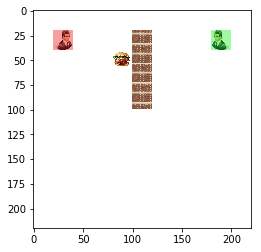

In [6]:
ax = plt.subplot(1,1,1)
ax.imshow(game.BuildImage())

plt.figure(figsize=(13,5))
#AIAgent.NextAction=Settings.PossibleActions[3]
game.Step()
ax = plt.subplot(1,3,1)
ax.imshow(game.BuildImage())
ax = plt.subplot(1,2,2)
ax.imshow(game.AgentViewPoint(AIAgent.ID))
ax = plt.subplot(1,2,2)
ax.imshow(game.AgentViewPoint(DAgent.ID))

In [7]:
def AddTextToImage(img,action,AgentView=0):
    img = np.array(img*255,dtype=np.uint8)
    img = Image.fromarray(img)
    #img = Image.fromarray(game.BuildImage())
    draw = ImageDraw.Draw(img)
    # font = ImageFont.truetype(<font-file>, <font-size>)
    font = ImageFont.truetype("LiberationSans-Bold.ttf", 12)
    # draw.text((x, y),"Sample Text",(r,g,b))
    if AgentView:
        draw.text((0, 0),"Action:{}".format(action),(255,0,0),font=font)
    else:
        draw.text((0, 0),"Action:{}".format(action),(0,0,0),font=font)
    return img

In [8]:
print('Testing Target Model')
TestingCounter=0
TestingCounter+=1
writer = skvideo.io.FFmpegWriter("Final_Results/VID_ENV_{}_Test_{}.avi".format(env,TestingCounter))
writer2 = skvideo.io.FFmpegWriter("Final_Results/VID_ENV_{}_TestAG_{}.avi".format(env,TestingCounter))
#game.GenerateWorld()
img = game.BuildImage()
game.Step()
plt.imsave('Final_Results/VID_ENV_{}_Test_{}.png'.format(env,TestingCounter),img)
Start = time()
episode_reward=0
observation = AIAgent.Flateoutput()

writer.writeFrame(AddTextToImage(game.BuildImage(),AIAgent.NextAction,0))
writer2.writeFrame(AddTextToImage(game.AgentViewPoint(AIAgent.ID),AIAgent.NextAction,1))
for t in range(1000):
    s =np.array([observation])
    q = model.predict(s, batch_size=1)
    action = np.argmax(q[0])
    #print(Settings.PossibleActions[action],action)
    AIAgent.NextAction = Settings.PossibleActions[action]
    print(AIAgent.NextAction)
    if env not in [4,5]:
        DAgent.DetectAndAstar()
    #print(DAgent.NextAction)
    game.Step()
    observation = AIAgent.Flateoutput()
    reward = AIAgent.CurrentReward
    #print(reward)
    done = game.Terminated[0]
    #observation, reward, done, info = env.step(action)
    episode_reward += reward
    writer.writeFrame(AddTextToImage(game.BuildImage(),'{},TR:{}'.format(AIAgent.NextAction,episode_reward),0))
    writer2.writeFrame(AddTextToImage(game.AgentViewPoint(AIAgent.ID),'{},TR:{}'.format(AIAgent.NextAction,episode_reward),1))
    if done:
        break

writer.close()
writer2.close()
Start = time()-Start
print(t)

Testing Target Model
[['L', 'E'], ['M', 'E']]
[['L', 'E'], ['M', 'E']]
[['L', 'E'], ['M', 'E']]
[['L', 'E'], ['M', 'E']]
[['L', 'E'], ['M', 'E']]
[['L', 'E'], ['M', 'E']]
[['L', 'E'], ['M', 'E']]
[['L', 'E'], ['M', 'E']]
[['L', 'E'], ['M', 'E']]
[['L', 'E'], ['M', 'E']]
[['L', 'E'], ['M', 'E']]
[['L', 'E'], ['M', 'E']]
[['L', 'E'], ['M', 'E']]
[['L', 'E'], ['M', 'E']]
13
